In [3]:
import pandas as pd
import numpy as np
import jieba
import wordcloud

In [4]:
# xls转化成csv
df = pd.read_excel('zoufan(1).xls')
df.to_csv('zoufan(1).csv', encoding='utf-8')

In [5]:
# csv写入dataframe
import csv
from pandas import DataFrame

In [6]:
rows = pd.read_csv('zoufan(1).csv', header=0,encoding='utf-8',dtype=str)

In [7]:
rows

,Unnamed: 0,id,用户名,性别,地区,评论,时间,表情
0,0,7509189899,偶然间经过,女,江苏,要有足够的自知之明,31分钟前,NaN
1,1,6289332039,BEASLAYER,女,其他,因为害怕，干脆拒绝一切,1小时前,NaN
2,2,6289332039,BEASLAYER,女,其他,对所有事物抱有恐惧,1小时前,NaN
3,3,2695315050,别睡了回家了,别睡了回家了,海外,饭饭 如果现在来一场车祸该多好 撞死我该多好,2小时前,NaN
4,4,1715253601,头拿混,男,广东,我真的做的太烂了,3小时前,NaN
...,...,...,...,...,...,...,...,...
469,469,7170374402,白日航船,男,其他,微博要是能按页数看就好了。在开发一个一键删博。,11-03,NaN
470,470,7170374402,白日航船,男,其他,主要是我太喜欢删东西了。还喜欢转发微博。又不喜欢微博一直是那么多条。感觉就像强迫症一样看着不方便。,11-03,NaN
471,471,7170374402,白日航船,男,其他,应该算日常生活吐槽➕ 分享那种,11-03,NaN
472,472,7170374402,白日航船,男,其他,就很多。各种都分享的那种（买过的东西和推荐的剧之类,11-03,NaN


In [8]:
import jieba.analyse
segments = []
for index, row in rows.iterrows():
    content = row[5] #这里表示第4列
    #TextRank 关键词抽取，只获取固定词性
    words = jieba.analyse.textrank(content, topK=50,withWeight=False,allowPOS=('ns', 'n', 'vn', 'v')) #词性'ns', 'n', 'vn', 'v'
    splitedStr = ''
    for word in words:
        # 记录全局分词
        segments.append({'word':word, 'count':1})
        splitedStr += word + ' '
dfSg = pd.DataFrame(segments)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\小冰\AppData\Local\Temp\jieba.cache
Loading model cost 0.643 seconds.
Prefix dict has been built successfully.


In [9]:
dfWord = dfSg.groupby('word')['count'].sum()
#导出词频csv
dfWord.to_csv('keywords1.csv',encoding='utf-8')

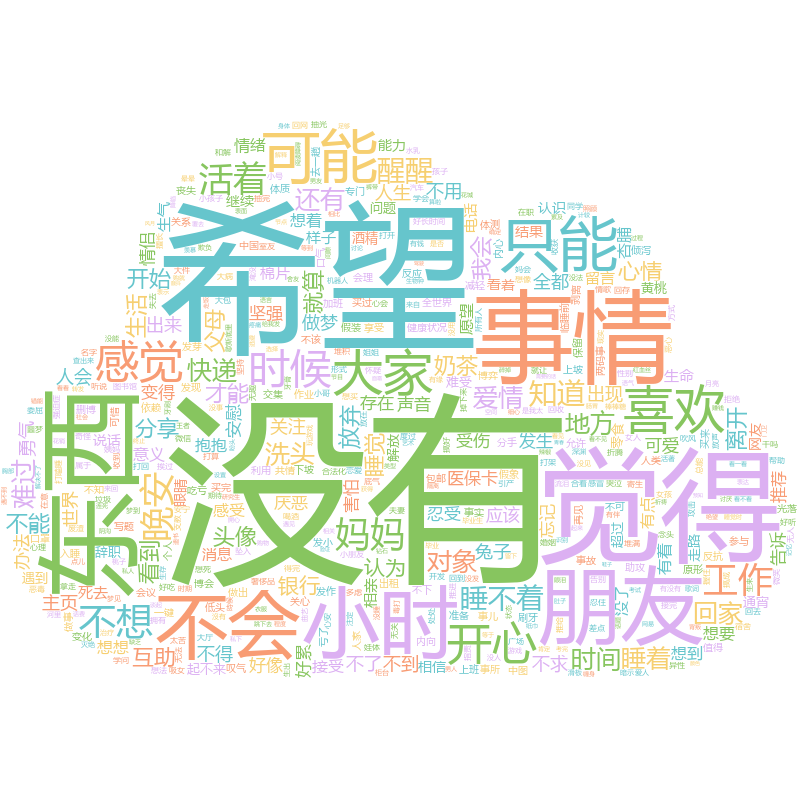

In [15]:
import stylecloud
from IPython.display import Image

stylecloud.gen_stylecloud(file_path='keywords1.csv', collocations=False,
                          palette='cartocolors.qualitative.Pastel_5',
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fas fa-cloud',size=800,
                          output_name='词云3.png')
Image(filename='词云3.png')